In [43]:
## bibliotecas necessarias
import librosa 
import matplotlib.pyplot as plt 
import numpy as np
import pickle as pkl
from datetime import datetime
from IPython.display import Audio # play audio, funciona apenas no jupyter
from auth_audio import AudioAuth
import pyaudio
%reload_ext auth_audio

In [46]:
p = pyaudio.PyAudio()
for ii in range(p.get_device_count()):
    print(p.get_device_info_by_index(ii).get('name'))

HD-Audio Generic: HDMI 0 (hw:0,3)
HD-Audio Generic: ALC255 Analog (hw:1,0)
hdmi
pulse
default


In [37]:
MEDIA_PATH = '../media'
TRAIN_FILE_PATH = F'{MEDIA_PATH}/train'
TEST_FILE_PATH = F'{MEDIA_PATH}/test'

In [48]:
aa = AudioAuth()

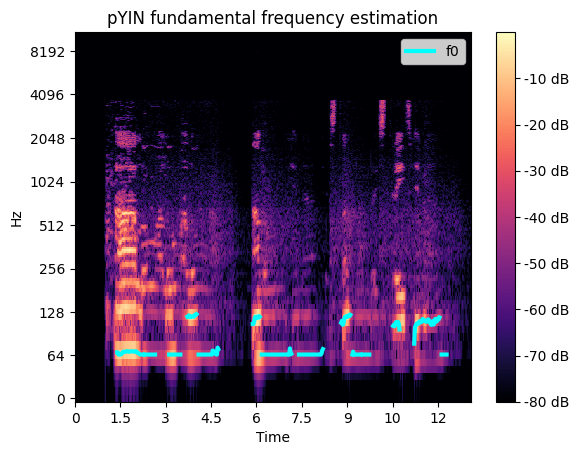

In [6]:
# lendo arquivo exemplo
filename = f'{TRAIN_FILE_PATH}/voice_10.wav'
sr = 44100
y, sr = librosa.load(filename, sr=sr)

f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), # calc f0
                                                    fmax=librosa.note_to_hz('C7'))

times = librosa.times_like(f0)

# plot do espectro ao longo do tempo e destaque na F0

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

In [50]:
# array para tirar uma media da freq. f0 do usuário
# lendo os arquivos em sequencia
file_list = [f'{TRAIN_FILE_PATH}/voice_{i}.wav' for i in range(1,11)]
aa.fit(file_list, sr)

f0 stats: 135.29 28.52


In [51]:
# Testando modelo proposto
for i in range(1,6):
    filename = f'{TEST_FILE_PATH}/voice_{i}.wav'
    print(filename)
    print("Usuario reconhecido:",aa.predict(filename, sr))


../media/test/voice_1.wav
Usuario reconhecido: True
../media/test/voice_2.wav
Usuario reconhecido: False
../media/test/voice_3.wav
Usuario reconhecido: False
../media/test/voice_4.wav
Usuario reconhecido: False
../media/test/voice_5.wav
Usuario reconhecido: False


/home/rbaisso/IdeaProjects/UFABC/eng-unificada-ii/auth_audio/src/auth_audio.py:21: RuntimeWarning: Mean of empty slice
  m0 = np.nanmean(f0)


In [52]:
user = 'rbaisso'
today_str = datetime.now().strftime("%Y%m%d")

with open(f'../model/{user}_model_{today_str}.pkl', 'wb') as file:
    pkl.dump(aa, file)